In [1]:
%matplotlib inline
import pickle
import dicto as do
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt

from python_path import PythonPath
with PythonPath("/code/traffic_sign_classifier/"):
    from german_traffic_densenet import model_fn
    from german_traffic_dataset import input_fn

In [2]:
params = do.load("/code/traffic_sign_classifier/configs.yml")
with open("/data/valid.p", "rb") as fd:
    validation = pickle.load(fd)

In [3]:
print({key: value.shape for key, value in validation.items()})

{'coords': (4410, 4), 'labels': (4410,), 'features': (4410, 32, 32, 3), 'sizes': (4410, 2)}


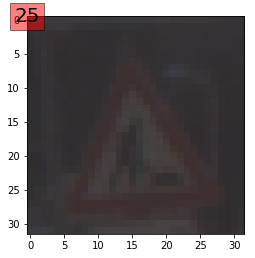

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(validation['features'][4400])
ax.text(0, 1, validation['labels'][4400], fontsize=20, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [5]:
labels_df = pd.DataFrame(validation['labels'], columns=['class_id'])
labels_df.groupby(['class_id']).size()

class_id
0      30
1     240
2     240
3     150
4     210
5     210
6      60
7     150
8     150
9     150
10    210
11    150
12    210
13    240
14     90
15     90
16     60
17    120
18    120
19     30
20     60
21     60
22     60
23     60
24     30
25    150
26     60
27     30
28     60
29     30
30     60
31     90
32     30
33     90
34     60
35    120
36     60
37     30
38    210
39     30
40     60
41     30
42     30
dtype: int64

In [6]:
from itertools import product
def make_indexes(tuple_index):
    rows, columns = tuple_index
    for index in product(range(rows), range(columns)):
        yield index

In [7]:
def plot_list(img_indexes, shape):
    try:
        grid = np.array(img_indexes).reshape(shape)
    except ValueError:
        grid = np.array(img_indexes + [-1]).reshape(shape)
    fig, axes = plt.subplots(*shape,)
    for index in make_indexes(shape):
        img_index  = grid[index]
        img = validation['features'][img_index]
        axes[index].set_title(validation['labels'][img_index])
        axes[index].imshow(img)
        axes[index].set_axis_off()

In [8]:
sample_list = labels_df.groupby(['class_id']).apply(lambda x: x.sample()).index.tolist()
sample_index = [x[1] for x in sample_list]

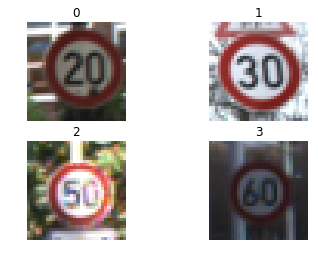

In [9]:
 plot_list(sample_index[0:4], shape=(2,2))

In [10]:
params = do.load("/code/traffic_sign_classifier/configs.yml")

In [11]:
validate_input_fn = lambda : input_fn(validation['features'].astype(np.float32), validation['labels'].astype(np.int32), params.train_params, training=False)

In [12]:
classifier = tf.estimator.Estimator(model_fn, model_dir=params.model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/models/paper_densenet_normalized_augmented', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7f88f590f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
predictions = classifier.predict(input_fn=validate_input_fn)

In [14]:
missclassified = []
for i, prediction in enumerate(predictions):
    if prediction['class_ids'] != labels_df.class_id.iloc[i]:
        print(i, prediction['class_ids'], labels_df.class_id.iloc[i])
        missclassified.append((prediction['class_ids'], labels_df.class_id.iloc[i]))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /models/paper_densenet_normalized_augmented/model.ckpt-55937
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
1 32 41
77 21 31
78 19 31
79 21 31
204 18 26
271 20 23
273 20 23
301 4 1
302 4 1
308 4 1
330 0 1
331 0 1
355 0 1
390 4 1
391 4 1
392 15 1
393 0 1
394 4 1
401 0 1
405 0 1
420 0 1
426 0 1
427 0 1
428 0 1
429 0 1
430 0 1
431 0 1
450 13 1
540 13 40
541 42 40
542 32 40
548 32 40
690 42 16
691 42 16
692 42 16
693 42 16
694 42 16
695 42 16
696 42 16
697 42 16
698 42 16
699 42 16
700 42 16
701 42 16
702 42 16
703 42 16
704 42 16
705 42 16
706 42 16
707 42 16
708 42 16
709 42 16
710 42 16
711 42 16
712 42 16
713 42 16
714 42 16
715 42 16
716 42 16
717 42 16
718 42 16
719 42 16
750 9 3
753 16 3
755 16 3
773 5 3
774 5 3
775 5 3
776 5 3
778 5 3
779 5 3
1287 28 11
1407 11 27
1408 11 27
1790 1 5
1795 6 5
1796

In [15]:
missclassified

[(32, 41),
 (21, 31),
 (19, 31),
 (21, 31),
 (18, 26),
 (20, 23),
 (20, 23),
 (4, 1),
 (4, 1),
 (4, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (4, 1),
 (4, 1),
 (15, 1),
 (0, 1),
 (4, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (13, 1),
 (13, 40),
 (42, 40),
 (32, 40),
 (32, 40),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (42, 16),
 (9, 3),
 (16, 3),
 (16, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (5, 3),
 (28, 11),
 (11, 27),
 (11, 27),
 (1, 5),
 (6, 5),
 (32, 5),
 (42, 38),
 (42, 38),
 (36, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (36, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (42, 38),
 (40, 38),
 (40, 38),
 (42, 38),
 (42, 38),
 (42,

In [16]:
len(labels_df.class_id)

4410

In [17]:
(len(missclassified)*100)/len(labels_df.class_id)

3.8321995464852607